# Visualización con Seaborn

Matplotlib ha demostrado ser una herramienta de visualización increíblemente útil y popular, pero incluso los usuarios más ávidos admitirán que a menudo deja mucho que desear.
Hay varias quejas válidas sobre Matplotlib que surgen a menudo:

- Antes de la versión 2.0, los valores por defecto de Matplotlib no son exactamente las mejores opciones. Se basó en MATLAB alrededor de 1999, y esto a menudo se nota.
- La API de Matplotlib es relativamente de bajo nivel. Hacer una visualización estadística sofisticada es posible, pero a menudo requiere *mucho* código repetitivo.
- Matplotlib es anterior a Pandas por más de una década, y por lo tanto no está diseñado para su uso con Pandas ``DataFrame``s. Para visualizar los datos de un ``DataFrame`` de Pandas, hay que extraer cada ``Serie`` y a menudo concatenarlas en el formato adecuado. Sería mejor tener una librería de ploteo que pudiera usar inteligentemente las etiquetas del ``DataFrame`` en un ploteo.

Una respuesta a estos problemas es [Seaborn](http://seaborn.pydata.org/). Seaborn proporciona una API sobre Matplotlib que ofrece opciones sanas para el estilo de trazado y los colores por defecto, define funciones simples de alto nivel para los tipos de trazado estadísticos comunes, y se integra con la funcionalidad proporcionada por Pandas ``DataFrame``.

## Seaborn Vs Matplotlib

He aquí un ejemplo de un simple gráfico de paseo aleatorio en Matplotlib, utilizando su clásico formato y colores.
Comenzamos con las importaciones típicas:

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 
import numpy as np
import pandas as pd

Ahora creamos algunos datos aleatorios:

In [28]:
# Crear algunos datos
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

Y hacer una trama sencilla:

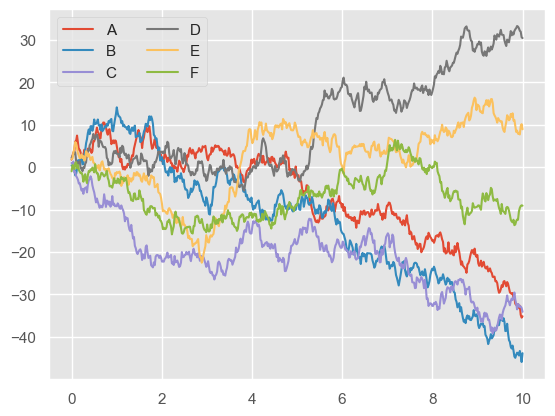

In [29]:
# Trazar los datos con los valores por defecto de Matplotlib
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Aunque el resultado contiene toda la información que nos gustaría que transmitiera, lo hace de una forma que no es del todo agradable estéticamente, e incluso parece un poco anticuada en el contexto de la visualización de datos del siglo XXI.

Veamos ahora cómo funciona con Seaborn.

Como veremos, Seaborn tiene muchas de sus propias rutinas de trazado de alto nivel, pero también puede sobrescribir los parámetros por defecto de Matplotlib y, a su vez, hacer que incluso simples scripts de Matplotlib produzcan resultados muy superiores.
Podemos establecer el estilo llamando al método ``set_theme()`` de Seaborn.
Por convención, Seaborn se importa como ``sns``:

In [30]:
import seaborn as sns
sns.set_theme()

Now let's rerun the same two lines as before:

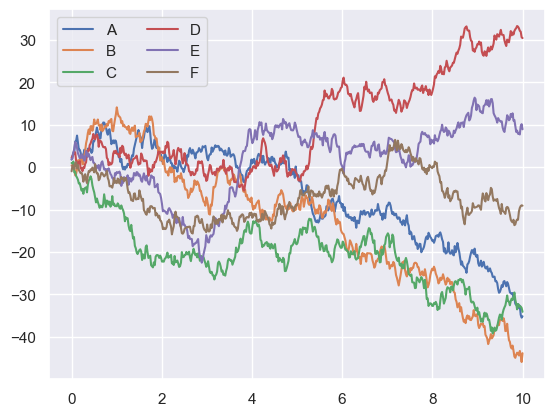

In [31]:
# mismo código de trazado que el anterior
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Explorando los plots Seaborn

La idea principal de Seaborn es que proporciona comandos de alto nivel para crear una variedad de tipos de gráficos útiles para la exploración de datos estadísticos, e incluso para el ajuste de modelos estadísticos.

Veamos algunos de los conjuntos de datos y tipos de gráficos disponibles en Seaborn. Tenga en cuenta que todo lo siguiente *podría* hacerse utilizando comandos Matplotlib sin procesar (esto es, de hecho, lo que Seaborn hace bajo el capó), pero la API de Seaborn es mucho más conveniente.

### Histogramas, KDE y densidades

A menudo, en la visualización de datos estadísticos, todo lo que quieres es trazar histogramas y distribuciones conjuntas de variables.
Hemos visto que esto es relativamente sencillo en Matplotlib:

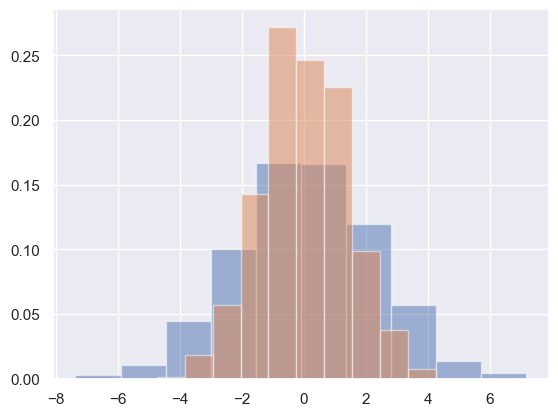

In [32]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5) # Density=false normaliza el grafico, lo coloca para que sea un grafico normal

En lugar de un histograma, podemos obtener una estimación suave de la distribución utilizando una estimación de la densidad del núcleo, lo que Seaborn hace con ``sns.kdeplot``:

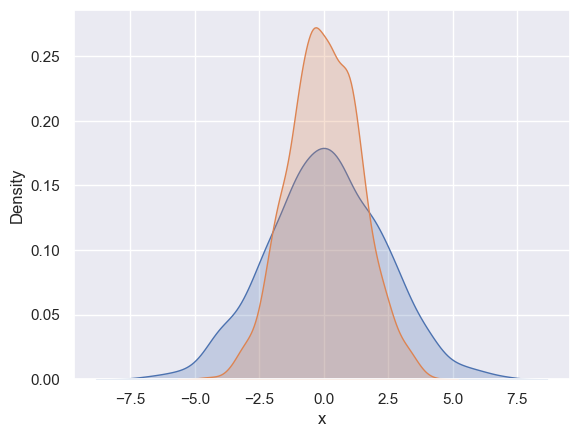

In [33]:
for col in 'xy':
    sns.kdeplot(data[col], fill=True)

Los histogramas y los KDE pueden combinarse

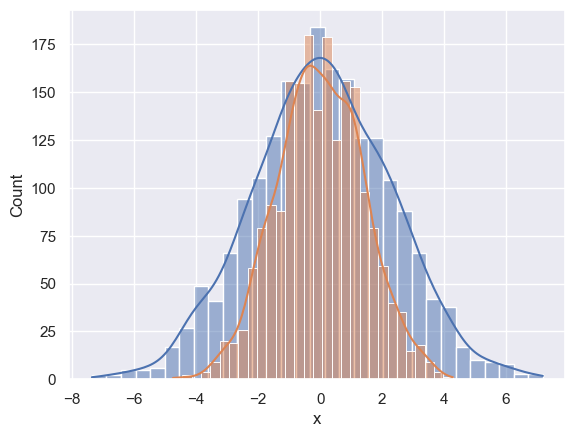

In [34]:
sns.histplot(data['x'],kde=True)
sns.histplot(data['y'],kde=True);

Si pasamos el conjunto de datos bidimensional completo a ``kdeplot``, obtendremos una visualización bidimensional de los datos:

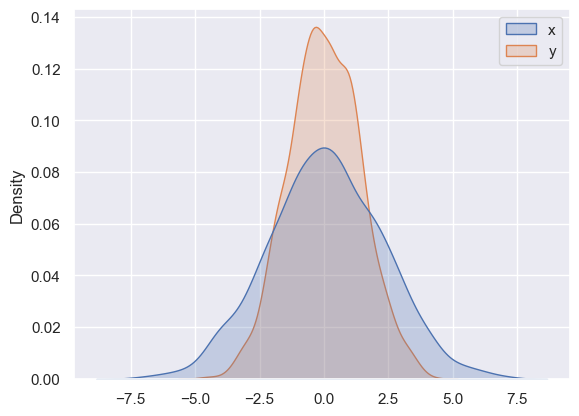

In [35]:
sns.kdeplot(data, fill = True);
# Se puede poner solo así: (funciona pero sin rellenarlos)
# sns.kdeplot(data) 

Podemos ver la distribución conjunta y las distribuciones marginales juntas utilizando ``sns.jointplot``.
Para este gráfico, vamos a establecer el estilo a un fondo blanco:

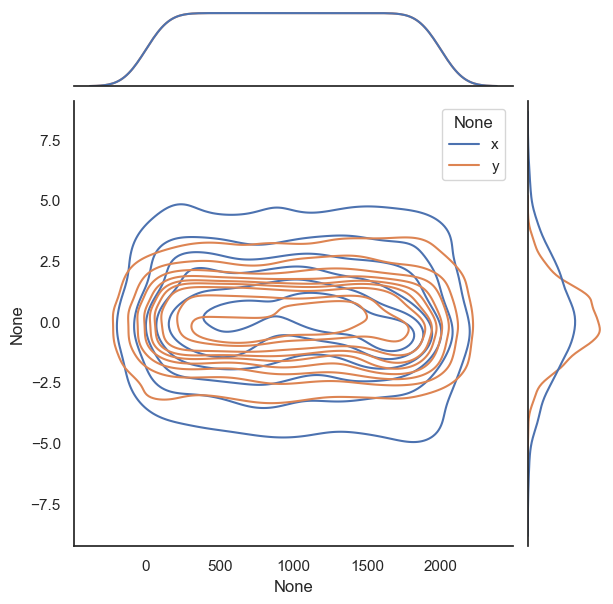

In [36]:
with sns.axes_style('white'):
    sns.jointplot(data[['x','y']], kind='kde'); # Si quitamos el kind= 'kde' sale muy distinto

### Pair plots

Cuando se generalizan los gráficos conjuntos a conjuntos de datos de mayores dimensiones, se obtienen *gráficos de pares*. Esto resulta muy útil para explorar correlaciones entre datos multidimensionales, cuando se desea representar todos los pares de valores entre sí.

Haremos una demostración con el conocido conjunto de datos Iris, que contiene medidas de pétalos y sépalos de tres especies de iris:

In [37]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

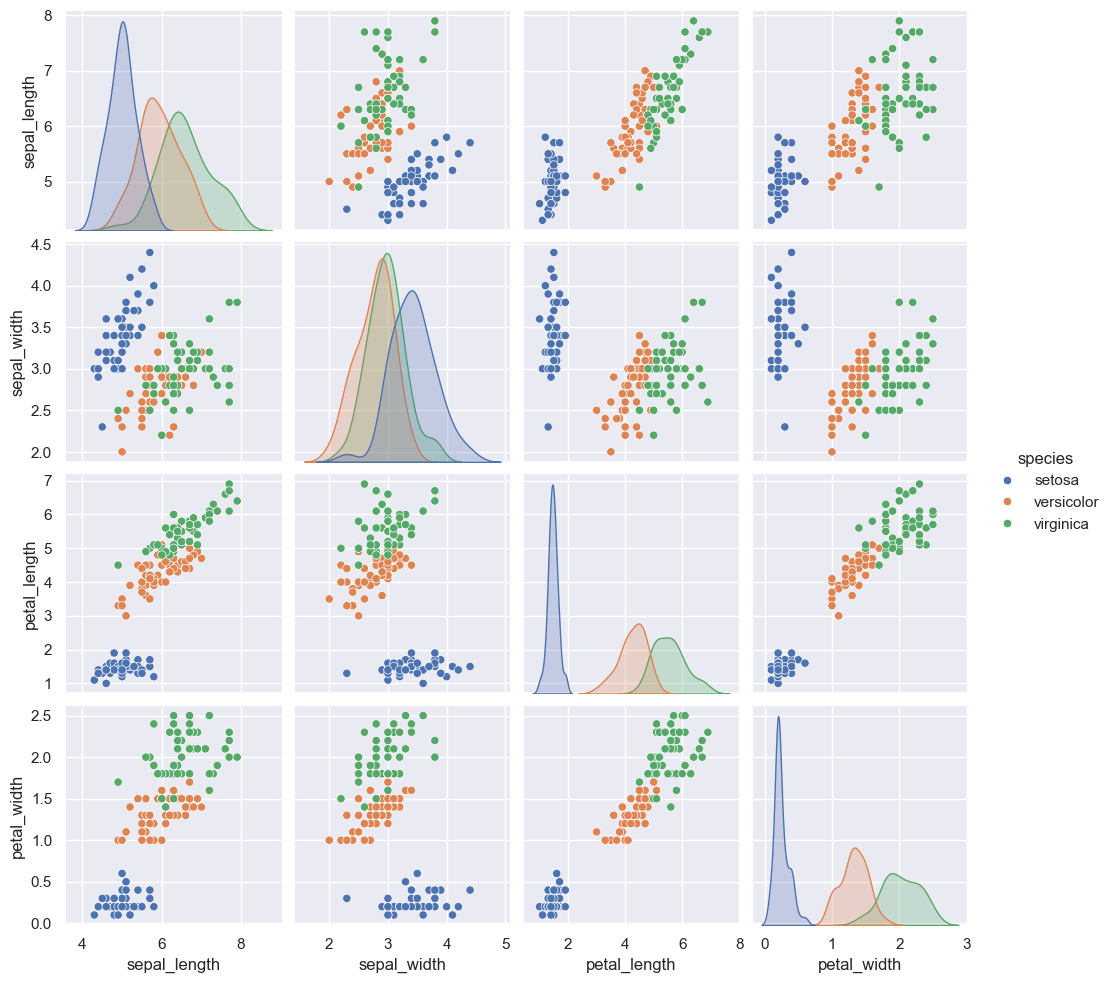

In [38]:
sns.pairplot(iris, hue='species', height=2.5);

In [39]:
# pairplot hace un analisis muy completo pero tarda muchisimo, ahora solo estamos trabajando con 150 datos pero si trebajas con 50000 va a ser imposible

### Histogramas facetados

A veces la mejor manera de ver los datos es a través de histogramas de subconjuntos. El ``FacetGrid`` de Seaborn lo hace extremadamente sencillo.
Vamos a ver unos datos que muestran la cantidad que el personal de un restaurante recibe en propinas en función de varios datos indicadores:

In [40]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


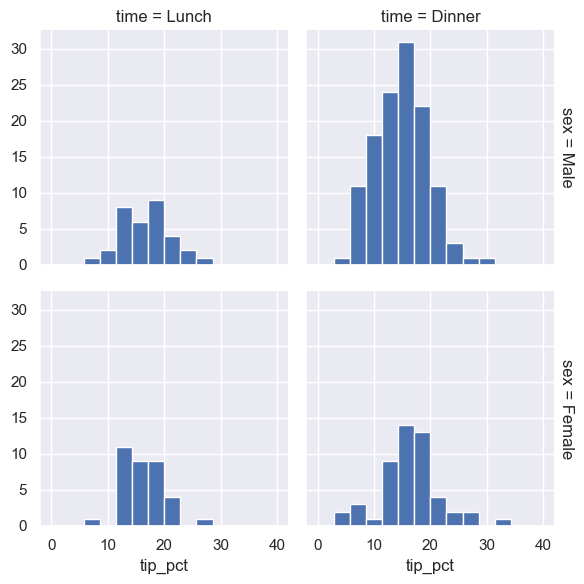

In [41]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Joint distributions

De forma similar al pairplot que vimos anteriormente, podemos utilizar ``sns.jointplot`` para mostrar la distribución conjunta entre diferentes conjuntos de datos, junto con las distribuciones marginales asociadas:

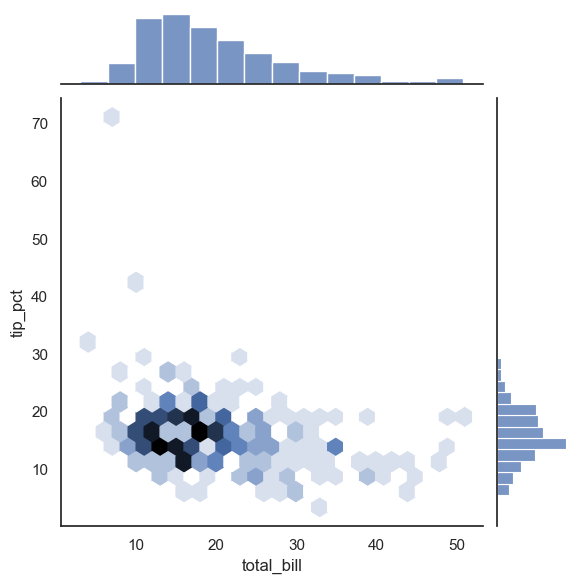

In [42]:
with sns.axes_style('white'):
    sns.jointplot(data=tips,x="total_bill", y="tip_pct",  kind='hex')

El gráfico conjunto puede incluso realizar una estimación automática de la densidad del núcleo y una regresión:

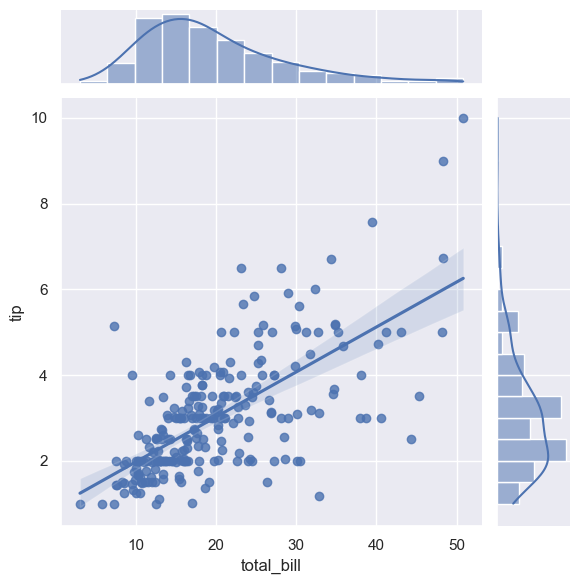

In [43]:
sns.jointplot(data=tips,x="total_bill", y="tip",  kind='reg')

### Bar plots

In [44]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


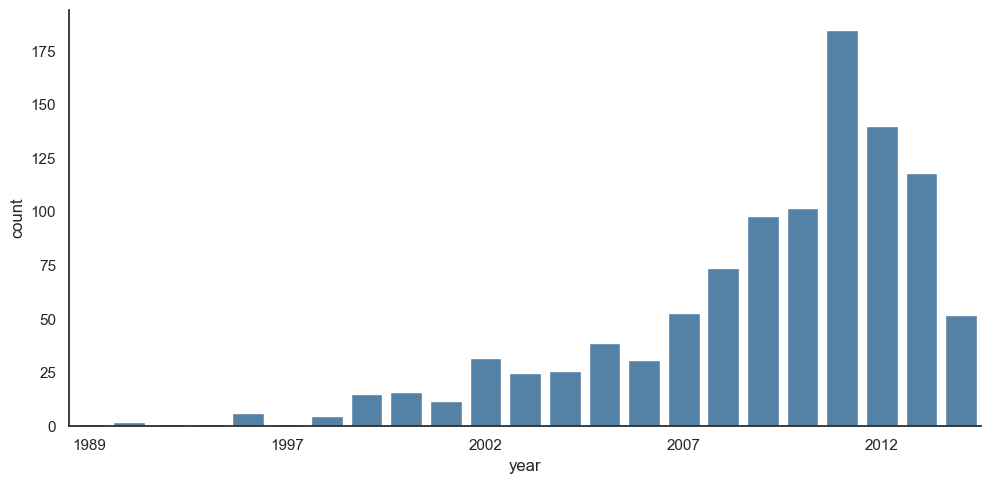

In [45]:
with sns.axes_style('white'):
    g = sns.catplot(data=planets,x="year",  aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

Podemos aprender más observando el *método* de descubrimiento de cada uno de estos planetas:

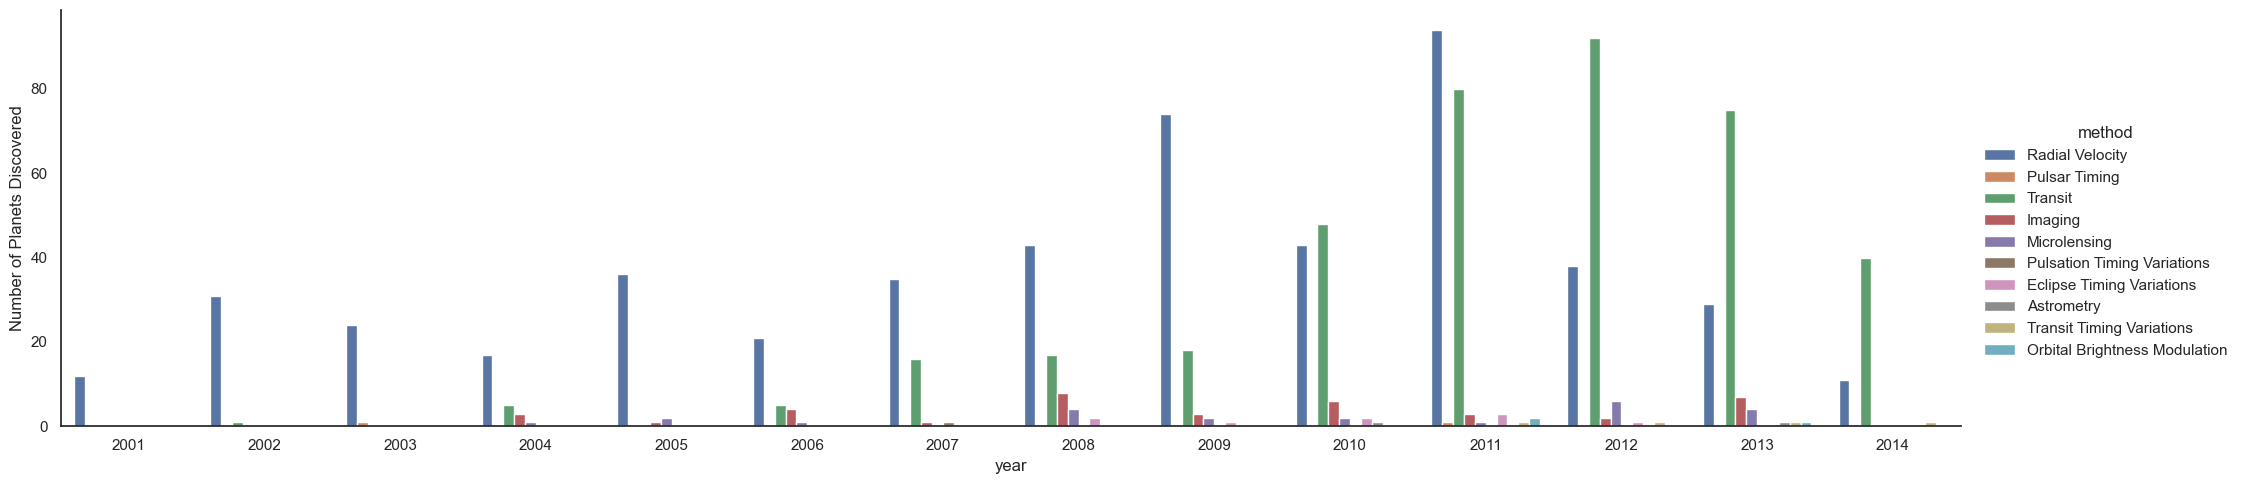

In [46]:
with sns.axes_style('white'):
    g = sns.catplot(data=planets,x="year", aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Ejemplo: Exploración de los tiempos de llegada al maratón

Aquí vamos a ver el uso de Seaborn para ayudar a visualizar y comprender los resultados finales de un maratón.

In [47]:
# !curl -o data/marathon-data.csv https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [52]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


Por defecto, Pandas carga las columnas de tiempo como cadenas de Python (tipo ``object``); podemos ver esto mirando el atributo ``dtypes`` del DataFrame:

In [51]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Arreglemos esto proporcionando un conversor para los tiempos:

In [54]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [55]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

Así queda mucho mejor. Para el propósito de nuestras utilidades de trazado Seaborn, vamos a añadir columnas que dan los tiempos en segundos:

In [56]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


Para hacernos una idea del aspecto de los datos, podemos trazar un ``jointplot`` sobre los datos:

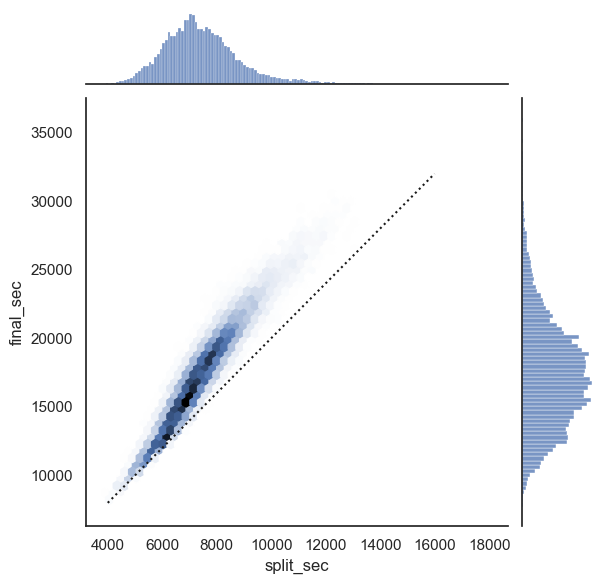

In [57]:
with sns.axes_style('white'):
    g = sns.jointplot( data,x="split_sec", y="final_sec", kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

La línea de puntos muestra dónde se situaría el tiempo de alguien que corriera el maratón a un ritmo perfectamente constante. El hecho de que la distribución se sitúe por encima de esta línea indica (como era de esperar) que la mayoría de la gente va más despacio a lo largo del maratón.
Si has corrido en competición, sabrás que los que hacen lo contrario -correr más rápido durante la segunda mitad de la carrera- se dice que han hecho un "parcial negativo".

Creemos otra columna en los datos, la fracción fraccionada, que mide el grado en que cada corredor fracciona negativa o positivamente la carrera:

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec'] # La diferencia
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Cuando esta diferencia de división es menor que cero, la persona divide negativamente la carrera en esa fracción.
Hagamos un gráfico de distribución de esta fracción de división:

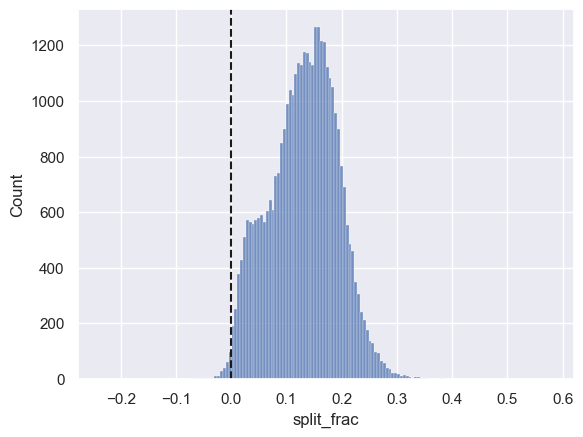

In [59]:
sns.histplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
sum(data.split_frac < 0) 

251

De los casi 40.000 participantes, sólo 250 hicieron un split negativo en su maratón (son profesionales)

Veamos si existe alguna correlación entre esta fracción de parciales y otras variables. Para ello utilizaremos ``pairgrid``, que dibuja gráficos de todas estas correlaciones:

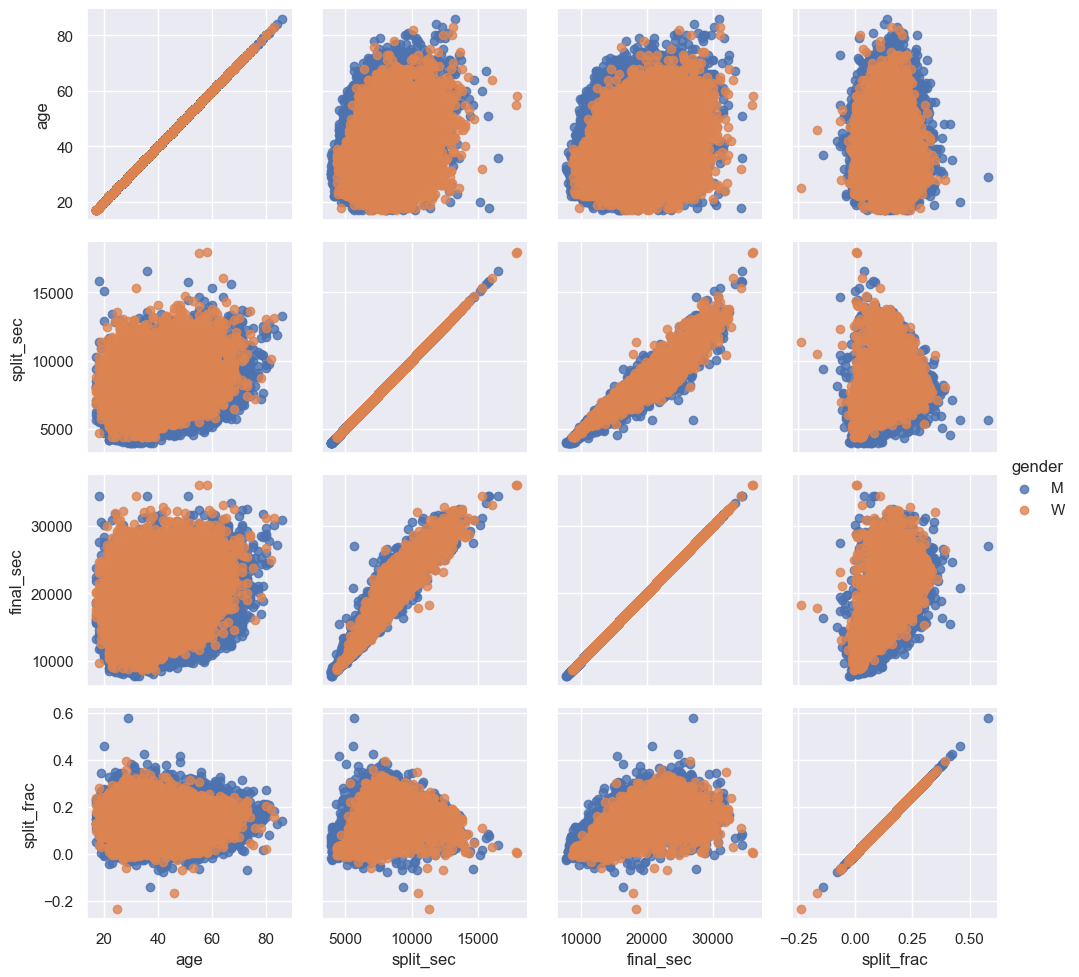

In [61]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Parece que la fracción de división no se correlaciona especialmente con la edad, pero sí con el tiempo final: los corredores más rápidos tienden a tener divisiones más cercanas a la par en su tiempo de maratón.

La diferencia entre hombres y mujeres es interesante. Veamos el histograma de fracciones divididas para estos dos grupos:

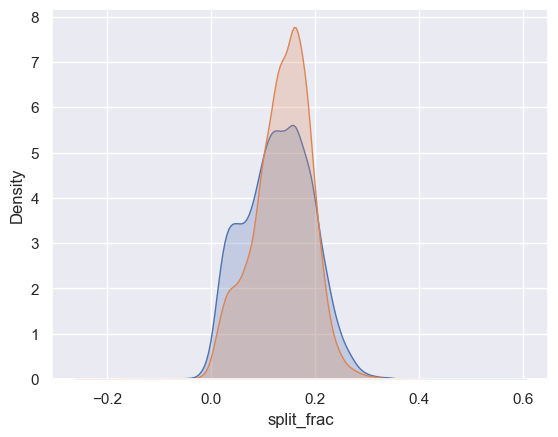

In [62]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');

Lo interesante aquí es que hay muchos más hombres que mujeres que corren casi a partes iguales.
Casi parece una distribución bimodal entre hombres y mujeres. Veamos si podemos averiguar lo que ocurre observando las distribuciones en función de la edad.

Una buena forma de comparar distribuciones es utilizar un *violin plot*.

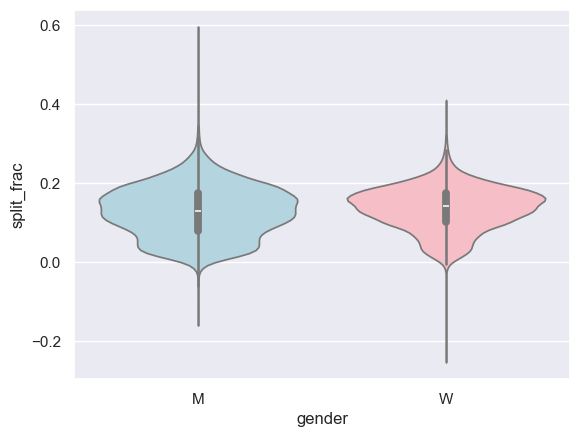

In [63]:
sns.violinplot(data=data, x="gender", y="split_frac", 
               hue="gender", palette=["lightblue", "lightpink"], legend=False);

Esta es otra forma de comparar las distribuciones entre hombres y mujeres.

Profundicemos un poco más y comparemos estos gráficos de violín en función de la edad. Empezaremos creando una nueva columna en la matriz que especifique la década de edad en la que se encuentra cada persona:

In [64]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


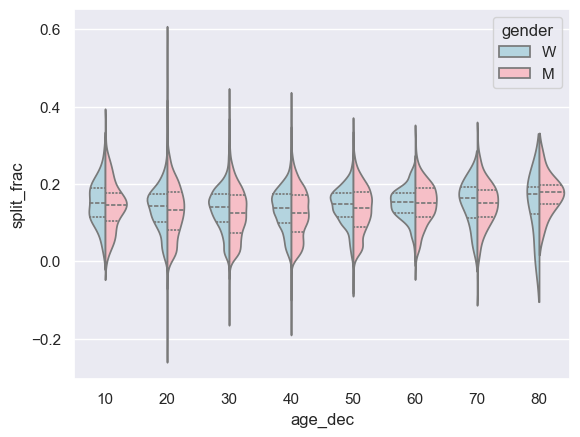

In [65]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"])


Si observamos esto, podemos ver en qué difieren las distribuciones de hombres y mujeres: las distribuciones de las divisiones de los hombres de entre 20 y 50 años muestran una pronunciada sobredensidad hacia las divisiones más bajas en comparación con las mujeres de la misma edad (o de cualquier edad, para el caso).

También resulta sorprendente que las mujeres de 80 años parezcan superar a *todos* en términos de tiempo de split. Esto se debe probablemente al hecho de que estamos estimando la distribución a partir de números pequeños, ya que sólo hay un puñado de corredoras en ese rango:

In [66]:
(data.age > 80).sum()

np.int64(7)

Volviendo a los hombres con parciales negativos: ¿quiénes son estos corredores? ¿Esta fracción se correlaciona con terminar rápido? Podemos representar esto muy fácilmente. Utilizaremos ``regplot``, que ajustará automáticamente una regresión lineal a los datos:

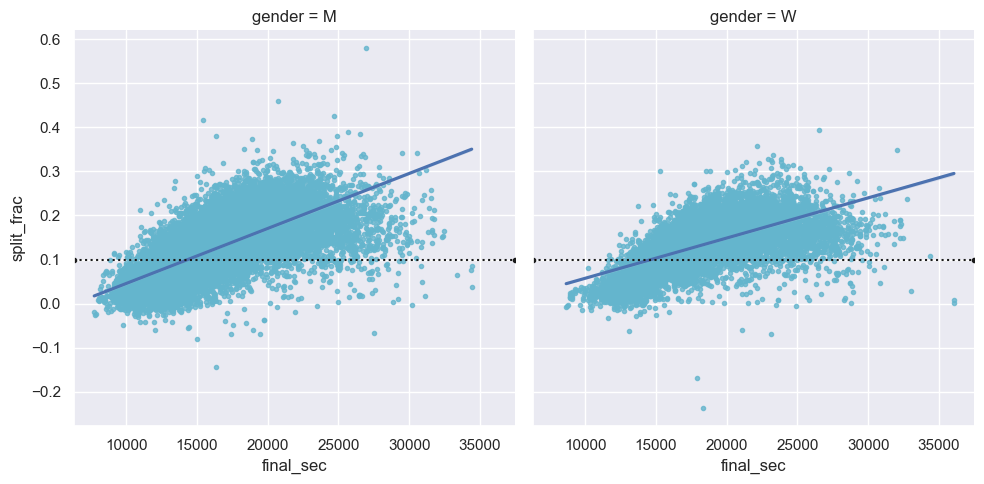

In [67]:
g = sns.lmplot(data=data,x='final_sec', y='split_frac', col='gender', 
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Al parecer, los corredores de élite que terminan la carrera en menos de 15.000 segundos, es decir, en unas 4 horas, son los que tienen parciales más rápidos. Las personas más lentas tienen muchas menos probabilidades de tener un segundo parcial rápido (estrategia de carrera en la cual un corredor completa la segunda mitad de la carrera más rápido que la primera mitad.).

<Axes: xlabel='final_sec'>

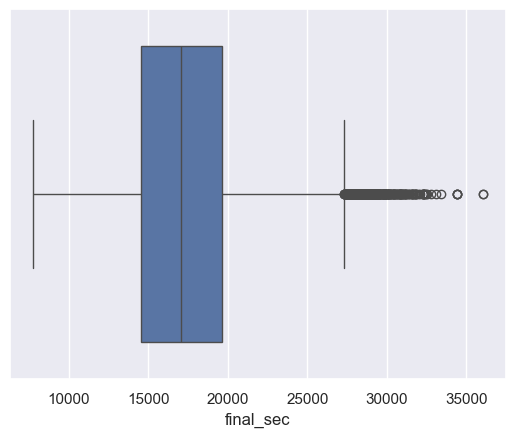

In [ ]:
# Outlayers (cosas atipicas) no es lo mismo que los errores
sns.boxplot(data= data, x= 'final_sec')

<!--NAVIGATION-->
< [Texto y Anotaciones](8-Text_y_Annotation.ipynb) | [Otras Librerías](10-Otras_librerias.ipynb) >

